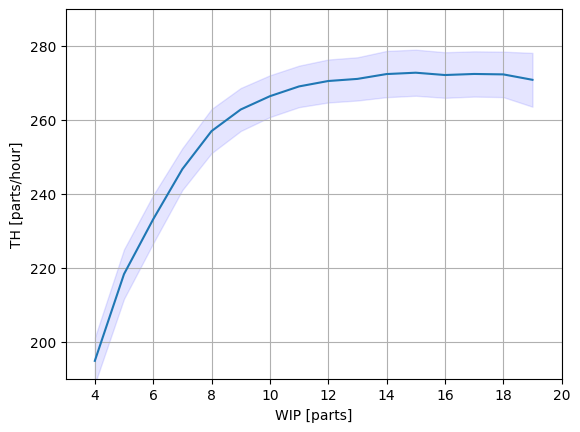

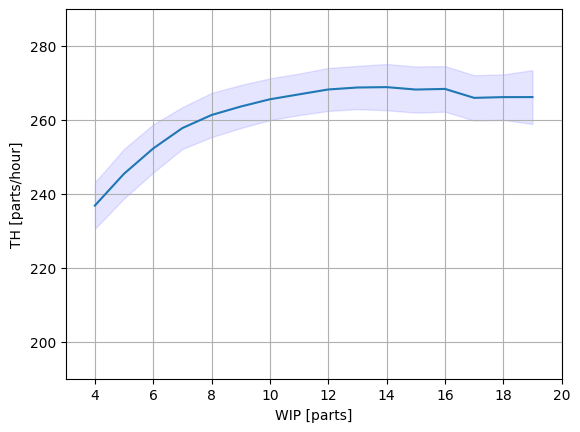

In [51]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

a = pd.read_excel("DBR_optimalWIP.xlsx",index_col=0)
b = pd.read_excel("setWIP.xlsx",index_col=0)

a = a.groupby('WIP [parts]').agg({'TH [parts/hour]': ['mean', 'count', 'std']})
a.columns = ['Average', 'Count', 'std']
a["ci"] = 2.1*a['std']/np.sqrt(20)

b = b.groupby('WIP [parts]').agg({'TH [parts/hour]': ['mean', 'count', 'std']})
b.columns = ['Average', 'Count', 'std']
b["ci"] = 2.1*a['std']/np.sqrt(20)



fig, ax1 = plt.subplots()

ax1.grid(True)
ax1.set_xlabel('WIP [parts]')
ax1.set_ylabel('TH [parts/hour]')
ax1.set_xlim(a.index.min()-1, a.index.max()+1)  # Adjust x-axis limits
ax1.set_ylim(190, 290)  # Adjust y-axis limits

ax1.plot(a.index, a['Average'])
ax1.fill_between(a.index, (a['Average']-a["ci"] ), (a['Average']+a["ci"] ), color='b', alpha=.1)

fig, ax2 = plt.subplots()

ax2.grid(True)
ax2.set_xlabel('WIP [parts]')
ax2.set_ylabel('TH [parts/hour]')
ax2.set_xlim(b.index.min()-1, b.index.max()+1)  # Adjust x-axis limits
ax2.set_ylim(190, 290)  # Adjust y-axis limits

ax2.plot(a.index, b['Average'])
ax2.fill_between(b.index, (b['Average']-a["ci"] ), (b['Average']+b["ci"] ), color='b', alpha=.1)


